# Try getting images and labels for one song. Steps:
- Step 1: Pick a song, load it and it's corresponding annotations file (00_Funk3-112-C#_comp_hex_cln)
- Step 2: Get labels as a matrix with starts and chord
- Step 3: Slice audio based on the starts list and create one image per start with duration
- Step 4: Try out printing image + chord + sound

### Step 1

In [ ]:
# load audio file in librosa
path_audio = "/content/gdrive/MyDrive/guit_data/audio/"
song_name = "00_Funk3-112-C#_comp_hex_cln.wav"
data, sr = librosa.load(path_audio + song_name)

In [ ]:
# listen to audio file
Audio(data=data, rate=sr)

In [ ]:
pip install jams

In [ ]:
import jams
path_annotations = "/content/gdrive/MyDrive/guit_data/annotations/"
annot_name = "00_Funk3-112-C#_comp.jams"
jam = jams.load(path_annotations + song_name)

### Step 2

In [ ]:
times_list = []
durations_list = []
chords_list = []

# extract chords information from jam file

for i in range(0, len(jam['annotations'])):   
    if jam['annotations'][int(i)]['namespace'] == 'chord':
      for j in range(0, len(sorted(jam['annotations'][int(i)]['data']))):
         line = list(jam['annotations'][int(i)]['data'][int(j)])[:-1]
         times_list.append(line[0])
         durations_list.append(line[1])
         chords_list.append(line[2])

# create dataframe
chords = pd.DataFrame({'time':times_list, 'duration':durations_list, 'chord':chords_list})
chords

In [ ]:
print(jam['annotations'][0]['annotation_metadata'])

{
  "curator": {
    "name": "",
    "email": ""
  },
  "annotator": {},
  "version": "",
  "corpus": "",
  "annotation_tools": "",
  "annotation_rules": "",
  "validation": "",
  "data_source": "0"
}


I'm running into an issue here. I have two annotations for chords. What's the difference? Here is information from the paper on this dataset [source](https://archives.ismir.net/ismir2018/paper/000188.pdf)
*Two different types of chord annotations accompany each
of the 180 excerpts. The first type of chord annotation
is the chord written in the lead sheet that is provided to
the guitar players at the time of data collection. However, in order to better fit the given genre, the players often modified the given chords, hereafter called instructed
chords. Therefore the performed chords are not necessarily the same as the instructed chords*
How can I differenciate the two?



In [ ]:
for i in range(0, len(jam['annotations'])): 
  if jam['annotations'][int(i)]['namespace'] == 'chord':
    print(jam['annotations'][int(i)]['annotation_metadata'])

{
  "curator": {
    "name": "",
    "email": ""
  },
  "annotator": {},
  "version": "",
  "corpus": "",
  "annotation_tools": "",
  "annotation_rules": "",
  "validation": "",
  "data_source": ""
}
{
  "curator": {
    "name": "",
    "email": ""
  },
  "annotator": {},
  "version": 0.9,
  "corpus": "",
  "annotation_tools": "",
  "annotation_rules": "Chord sheet-informed symbolic chord transcription based on the included separate string note transcriptions with the chord segmentation and root derived from sheet music.",
  "validation": "",
  "data_source": "Semi-automatic chord transcription with manual verification"
}


It seems like the **performed** chords have values in the annotation_rules. Let's confirm this by looking at a few other songs

In [ ]:
jam2 = jams.load(path_annotations + "00_BN1-129-Eb_comp.jams")

for i in range(0, len(jam2['annotations'])): 
  if jam2['annotations'][int(i)]['namespace'] == 'chord':
    print(jam2['annotations'][int(i)]['annotation_metadata'])

{
  "curator": {
    "name": "",
    "email": ""
  },
  "annotator": {},
  "version": "",
  "corpus": "",
  "annotation_tools": "",
  "annotation_rules": "",
  "validation": "",
  "data_source": ""
}
{
  "curator": {
    "name": "",
    "email": ""
  },
  "annotator": {},
  "version": 0.9,
  "corpus": "",
  "annotation_tools": "",
  "annotation_rules": "Chord sheet-informed symbolic chord transcription based on the included separate string note transcriptions with the chord segmentation and root derived from sheet music.",
  "validation": "",
  "data_source": "Semi-automatic chord transcription with manual verification"
}


In [ ]:
jam3 = jams.load(path_annotations + "00_Jazz1-200-B_comp.jams")

for i in range(0, len(jam3['annotations'])): 
  if jam3['annotations'][int(i)]['namespace'] == 'chord':
    print(jam3['annotations'][int(i)]['annotation_metadata'])

{
  "curator": {
    "name": "",
    "email": ""
  },
  "annotator": {},
  "version": "",
  "corpus": "",
  "annotation_tools": "",
  "annotation_rules": "",
  "validation": "",
  "data_source": ""
}
{
  "curator": {
    "name": "",
    "email": ""
  },
  "annotator": {},
  "version": 0.9,
  "corpus": "",
  "annotation_tools": "",
  "annotation_rules": "Chord sheet-informed symbolic chord transcription based on the included separate string note transcriptions with the chord segmentation and root derived from sheet music.",
  "validation": "",
  "data_source": "Semi-automatic chord transcription with manual verification"
}


I'm going to assume that **instructed chords** don't have data in `annotation_rules"`, and that **performed chords** have some. 
For this project, I'm going to take as target variables the instructed chords, to limit the number of classes to predict (25 classes). Let's change the code so that I can extract only the instructed chords

In [ ]:
start_list = []
durations_list = []
chords_list = []

# extract chords information from jam file

for i in range(0, len(jam['annotations'])):   
    if jam['annotations'][int(i)]['namespace'] == 'chord':
      if jam['annotations'][int(i)]['annotation_metadata']['annotation_rules'] == '':
        for j in range(0, len(sorted(jam['annotations'][int(i)]['data']))):
          line = list(jam['annotations'][int(i)]['data'][int(j)])[:-1]
          times_list.append(line[0])
          durations_list.append(line[1])
          chords_list.append(line[2])

# create dataframe
chords = pd.DataFrame({'time':times_list, 'duration':durations_list, 'chord':chords_list})
chords

In [ ]:
# get code to have start list and labels
######## FINAL CODE
start_list = []
chords_list = []
durations_list = []
name = []

for i in range(0, len(jam['annotations'])):   
    if jam['annotations'][int(i)]['namespace'] == 'chord':
      if jam['annotations'][int(i)]['annotation_metadata']['annotation_rules'] == '':
        for j in range(0, len(sorted(jam['annotations'][int(i)]['data']))):
          line = list(jam['annotations'][int(i)]['data'][int(j)])[:-1]
          start_list.append(line[0])
          durations_list.append(line[1])
          chords_list.append(line[2])
          name.append(song_name + '_' + str(j))

chords = pd.DataFrame({'name': name, 'time':start_list, 'duration':durations_list, 'chord':chords_list})

In [ ]:
chords

In [ ]:
# export dataframe
chords.to_csv("/content/gdrive/MyDrive/guit_data/tests/labels/chords.csv")

### Step 3

In [ ]:
print(song_name)
print(annot_name)

00_Funk3-112-C#_comp_hex_cln.wav
00_Funk3-112-C#_comp.jams


In [ ]:
print(path_audio)
path_images = "/content/gdrive/MyDrive/guit_data/tests/images/"
print(path_images)

/content/gdrive/MyDrive/guit_data/audio/
/content/gdrive/MyDrive/guit_data/tests/images/


In [ ]:
chords.head(2)

,name,time,duration,chord
0,00_Funk3-112-C#_comp.jams_0,0.000000,2.142857,C#:maj
1,00_Funk3-112-C#_comp.jams_1,2.142857,2.142857,G#:maj


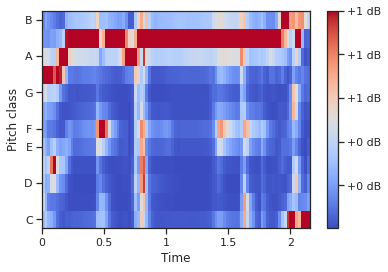

In [ ]:
# try one image
data, sr = librosa.load(path_audio + song_name, offset=chords.time[2], duration=chords.duration[2])
chromagram = librosa.feature.chroma_stft(data, sr=sr)
librosa.display.specshow(chromagram, sr=sr, x_axis='time', y_axis='chroma',cmap='coolwarm')
plt.colorbar(format='%+2.0f dB')

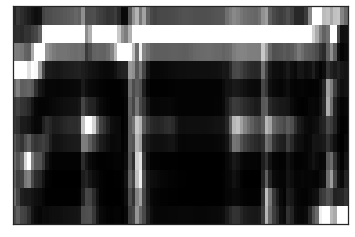

In [ ]:
# try output format
librosa.display.specshow(chromagram, sr=sr, cmap='gray')

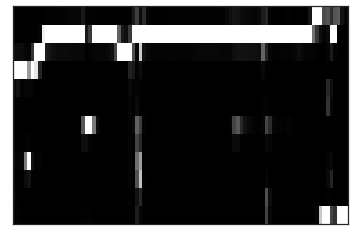

In [ ]:
# try output format using magphase
chromagram_mag = librosa.magphase(chromagram)[0]**4
librosa.display.specshow(chromagram_mag, sr=sr, cmap='gray')

In [ ]:
# split the audio based on starts from annotation file and create images

for i in range(len(chords.time)):
  data, sr = librosa.load(path_audio + song_name, offset=chords.time[i], duration=chords.duration[i])

  # create chromagram
  chromagram = librosa.feature.chroma_stft(data, sr=sr)
  chromagram_mag = librosa.magphase(chromagram)[0]**4

  # save image
  img_name = song_name[:-4] + '_' + str(i)
  fig = plt.figure(figsize=(2, 2))
  librosa.display.specshow(chromagram_mag, sr=sr, cmap='gray')
  fig.savefig(path_images + img_name)

In [ ]:
len(data_list)

16

### Step 4

In [ ]:
import matplotlib.image as mpimg

In [ ]:
# create data for the audio
data_list = []
for i in range(len(chords.time)):
  data, sr = librosa.load(path_audio + song_name, offset=chords.time[i], duration=chords.duration[i])
  data_list.append(data)

In [ ]:
# print unique chords of the song
chords.chord.unique()

array(['C#:maj', 'G#:maj', 'A#:min', 'F:min', 'F#:maj'], dtype=object)

#### C#:maj

In [ ]:
chords[chords.chord == 'C#:maj'].index

Int64Index([0, 5, 8, 13], dtype='int64')

C#:maj


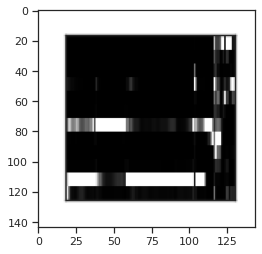

In [ ]:
#0, 5, 8, 13 C#:maj
# 0
print(chords.chord[0])
imgplot = plt.imshow(mpimg.imread(path_images + song_name[:-4] + '_' + str(0) + '.png'))
Audio(data=data_list[0], rate=sr)


C#:maj


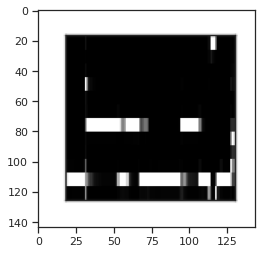

In [ ]:
#5
print(chords.chord[5])
imgplot = plt.imshow(mpimg.imread(path_images + song_name[:-4] + '_' + str(5) + '.png'))
Audio(data=data_list[5], rate=sr)

C#:maj


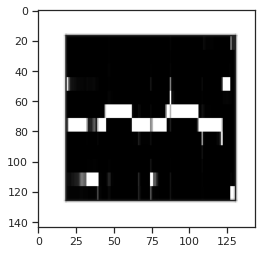

In [ ]:
#8
print(chords.chord[8])
imgplot = plt.imshow(mpimg.imread(path_images + song_name[:-4] + '_' + str(8) + '.png'))
Audio(data=data_list[8], rate=sr)

C#:maj


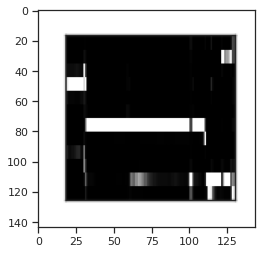

In [ ]:
#13
print(chords.chord[13])
imgplot = plt.imshow(mpimg.imread(path_images + song_name[:-4] + '_' + str(13) + '.png'))
Audio(data=data_list[13], rate=sr)

#### G#:maj

In [ ]:
chords[chords.chord == 'G#:maj'].index

Int64Index([1, 7, 9, 15], dtype='int64')

G#:maj


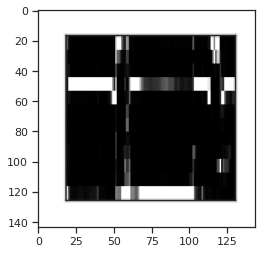

In [ ]:
#1
print(chords.chord[1])
imgplot = plt.imshow(mpimg.imread(path_images + song_name[:-4] + '_' + str(1) + '.png'))
Audio(data=data_list[1], rate=sr)

G#:maj


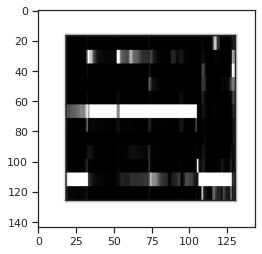

In [ ]:
#7
print(chords.chord[7])
imgplot = plt.imshow(mpimg.imread(path_images + song_name[:-4] + '_' + str(7) + '.png'))
Audio(data=data_list[7], rate=sr)

G#:maj


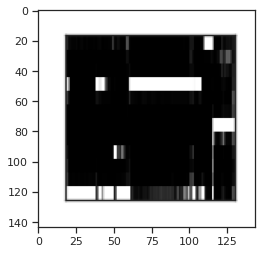

In [ ]:
#9
print(chords.chord[9])
imgplot = plt.imshow(mpimg.imread(path_images + song_name[:-4] + '_' + str(9) + '.png'))
Audio(data=data_list[9], rate=sr)

G#:maj


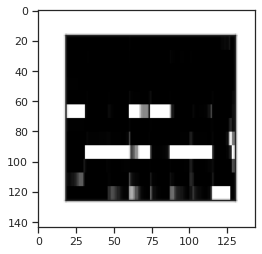

In [ ]:
#15
print(chords.chord[15])
imgplot = plt.imshow(mpimg.imread(path_images + song_name[:-4] + '_' + str(15) + '.png'))
Audio(data=data_list[15], rate=sr)